# Model Development

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('clean_df.csv')
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,price-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,64.1,...,111.0,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,64.1,...,111.0,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,65.5,...,154.0,5000.0,19,26,16500.0,Low,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,66.2,...,102.0,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,66.4,...,115.0,5500.0,18,22,17450.0,Low,0,1,1,0


## Linear Regression and Multiple Linear Regression

#### Simple Linear Regression<br/>
### $$\hat{y}= a + bx$$

In [3]:
from sklearn.linear_model import LinearRegression

Now that we just imported the LinearRegression module, lets create our object.

In [43]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Cool, we already have our object, now lets define the predictor variable(x) and target variable(y).

In [44]:
x=df[['highway-mpg']]
y=df[['price']]

Let's put our variables to fit(train) and find the equation that helps predict the target variable.

In [45]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Ok now we can obtain our prediction.

In [46]:
yhat=lm.predict(x)
yhat[:10]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682]])

### So, we already fitted our model and created our prediction, but what it's the value of "a" and "b"?

In [47]:
print('a={} and b={}'.format(lm.intercept_,lm.coef_))

a=[38423.30585816] and b=[[-821.73337832]]


### So our linear regression prediction formula will be:<br/>
### $$\hat{y}= 38423.31 - 821.73x$$
### Price = $\hat{y}$
### Highway-mpg = x

## Multiple Linear Regression

If we have for example 4 predictor variables the equation of y hat will be like that.

### $$\hat{y} = a + b_1 x_1 + b_2 x_2 + b_3 x_3 + b_4 x_4$$

In [48]:
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

Ok, now that we have what the want, let's train our model.

In [49]:
lm.fit(z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_hat=lm.predict(z)
y_hat[:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

Now let's found out our intercept and coefficient's.

In [51]:
lm.intercept_

-15806.62462632923

In [52]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

So when we put that in our formula of $\hat{y}$, we will have that result right here:

### $$\hat{y} = -15806.62 + 53.50 x_1 + 4.71 x_2 + 81.53 x_3 + 36.06 x_4$$

## Model Evaluation with Visualization

In [26]:
import seaborn as sns

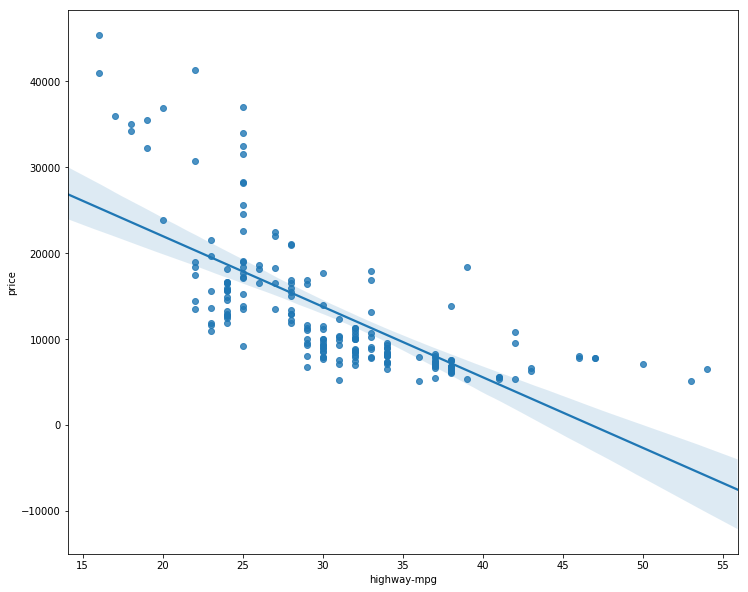

In [31]:
plt.figure(figsize=(12,10))
sns.regplot(x='highway-mpg',y='price',data=df)

If we look at this plot, we'll see that the points around the regression line have really high variance, so plotting these graphs it's a really good indicator to see if our linear model is the best fit or not.

## Residual Plot for Validation

What is residual?<br/>
Residual is the difference between y and $\hat{y}$.<br/><br/>
When the residual plot is good for our model?<br/>
When the mean is equal to 0 and the data is spread out on the x-axis without any curvature or make any line.

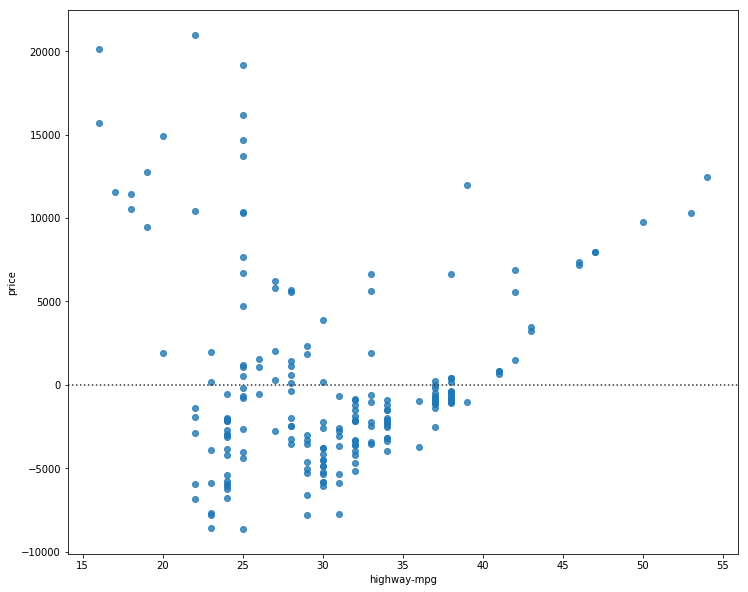

In [33]:
plt.figure(figsize=(12,10))
sns.residplot(x='highway-mpg',y='price',data=df)

## Distributions

Here we can see a distribution using MLR(Multiple Linear Regression). If we compare to a SLR(Simple Linear Regression) the fitted values will have a high variance between the actual values and some values will not appear in the graph.

Text(0, 0.5, 'Proportion of Cars')

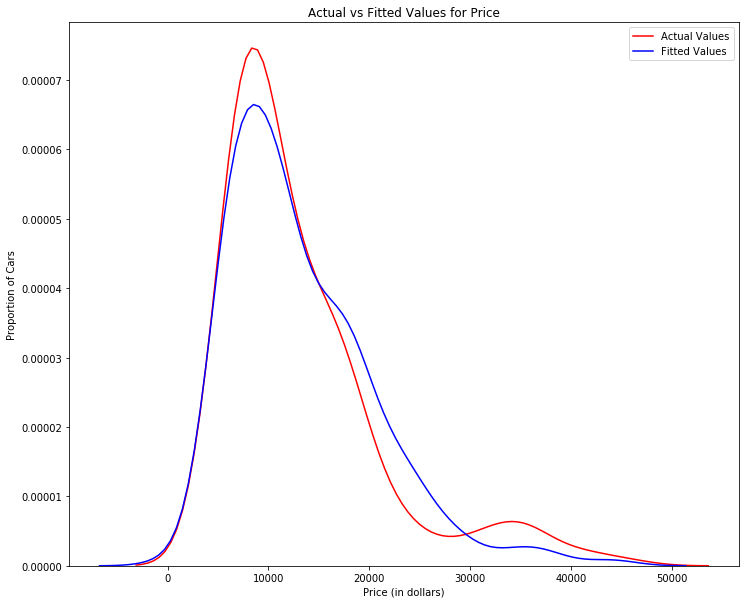

In [53]:
plt.figure(figsize=(12,10))
ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Values')
sns.distplot(y_hat,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

Text(0, 0.5, 'Proportion of Cars')

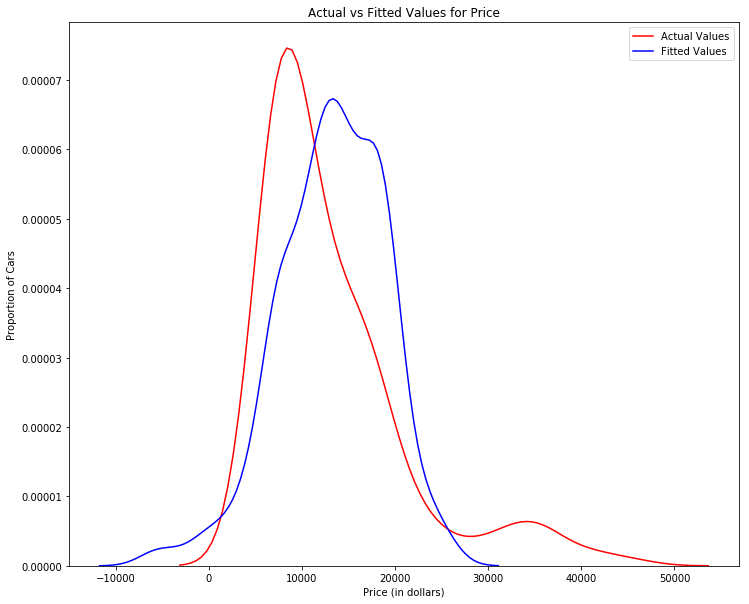

In [54]:
plt.figure(figsize=(12,10))
ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Values')
sns.distplot(yhat,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

## Polynomial Regression and Pipelines

Polynomial Regression a.k.a non-linear relationship it's used when linear models cannot predict close results.

We have different orders of polynomial regression, here are some of those:<br/>
<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X_1 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X_1 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X_1 +b_2 X^2 +b_3 X^3 ....\\
$$

Let's calculate a Cubic order function to make an example how to create a polynomial model.

In [57]:
x=df['highway-mpg']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


To make it easier, we can use a function below to create a graph to visualize the data.

In [58]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

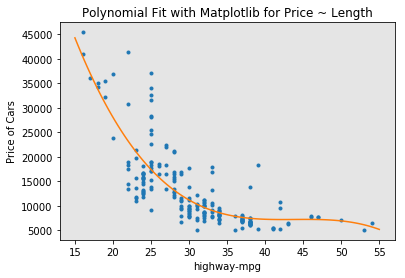

In [59]:
PlotPolly(p,x,y,'highway-mpg')

### Polynomial Regression with More the One Dimension

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
pr=PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(df[['horsepower','curb-weight']])

In [62]:
df.shape

(201, 29)

In [63]:
x_polly.shape

(201, 5)

## Pipeline

There are many steps to getting a prediction.<br/>
Normalization and Polynomial Transform can be easier if we use Pipeline to transformation. Then we use Linear Regression to create the model and make predictions.<br/>
### $$ Normalization -> Polynomial Transform -> Linear Regression$$<br/>

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [65]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [66]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [67]:
pipe.fit(z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [69]:
ypipe=pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## Measures for In-Sample Evaluation

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.<br/>
We use $R^2$ and <b>Mean Squared Error(MSE)</b>.<br/><br/>
<b>$R^2$</b><br/>
R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. So higher the $R^2$ value is, more close to the real values it is.<br/><br/>
<b>MSE</b><br/>
The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (\hat{y}). So lower the MSE value it is, will be better for our model.

## $$ R^2 = (1-\frac{MSE of regression line}{MSE of the average of the data}) $$

### Simple Linear Regression

### $R^2$

In [74]:
x=df[['highway-mpg']]
y=df['price']
lm.fit(x,y)
lm.score(x,y)

0.4965911884339176

### MSE

In [75]:
from sklearn.metrics import mean_squared_error
Yhat=lm.predict(x)
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


### Multiple Linear Regression

### $R^2$

In [77]:
lm.fit(z, df['price'])
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093562806577457


### MSE

In [78]:
Y_predict_multifit = lm.predict(z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Polynomial Fit

### $R^2$

In [79]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


### MSE

In [81]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### In conclusion the best prediction model for our data is MLR because it is the highest R-scored and we know that have multiple variables that interfer in the price of the car, for example the color, type, doors, etc.